In [7]:
!pip install cplex docplex networkx

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pandas as pd
import random
from itertools import combinations, groupby
import networkx as nx
import random
from docplex.mp.model import Model
import matplotlib.pyplot as plt
import pickle
import csv

from cplex.callbacks import SolveCallback
from cplex.exceptions import CplexError

In [9]:
G = nx.Graph()
n = 20

edges = combinations(range(n), 2)

for i in range(n):
    G.add_node(i, weight = random.randint(1,100))

for _, node_edges in groupby(edges, key=lambda x: x[0]):
    node_edges = list(node_edges)
    random_edge = random.choice(node_edges)
    G.add_edge(*random_edge)
    for e in node_edges:
        if random.random() < 0.5:
            G.add_edge(*e)

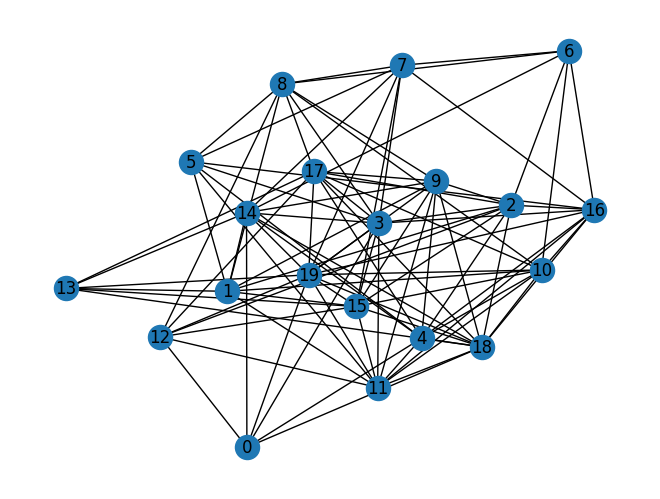

In [69]:
#nx.draw(G,  with_labels = True)

In [23]:
from docplex.mp.model import Model
import cplex.callbacks
#IncumbentCallback
class Incumbente(cplex.callbacks.IncumbentCallback):
    def __call__(self):
        print ("El callback Incumbente dice: ")
        print (self.get_solution_source())
        print(self.get_values())
        print(self.get_node_data())
              
m = Model(name='Minimum Weighted Vertex Cover')
x = m.binary_var_list(n, name="x")
w_v = dict(G.nodes(data="weight", default=1))
obj_fn = sum(w_v[i] * x[i] for i in range(n))
m.set_objective("min", obj_fn)

for i in range(n):
    m.add_constraint(x[i] >= 0, 'Cons_1')

for i,j in enumerate([list(adj[1][1]) for adj in enumerate(G.adjacency())]):
    for z in j:
        m.add_constraint(x[i] + x[z] >= 1, 'Cons_2') 

m.print_information()
print('*'*30)
m.print_solution()
inc = m.register_callback(Incumbente) 

Model: Minimum Weighted Vertex Cover
 - number of variables: 20
   - binary=20, integer=0, continuous=0
 - number of constraints: 226
   - linear=226
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP
******************************


In [22]:
print(inc.get_MIP_relative_gap)

<bound method MIPInfoCallback.get_MIP_relative_gap of <__main__.Incumbente object at 0x7f34f8bc6c80>>


In [24]:

m.solve(log_output=True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
Legacy callback                                  ID
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve eliminated 199 rows and 0 columns.
MIP Presolve modified 27 coefficients.
Reduced MIP has 27 rows, 20 columns, and 116 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Clique table members: 27.
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.06 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0      659.0000 

docplex.mp.solution.SolveSolution(obj=677,values={x_0:1,x_1:1,x_3:1,x_4:..

In [25]:
relx = m.solution.get_values(x)
relx

[1.0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
#x = m.continuous_var(name="x", lb=0)
#c1 = m.add_constraint(x >= 2, ctname="const1")
#m.set_objective("min", 3*x)
